### Census Income Project
### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Machine Learning Steps:
    1.Define required libraries with which the model will optmised.
    2.Data Cleansing and Wrangling.
    3.Feature Engineering
    4.Data pre-processing
    5.Feature selection
    6.Split the data into training and testing
    7.Model selection
    8.Model validation
    9.Interpret the results

### Define the required libraries

In [5]:
#as of now we will import pandas, numpy library and the remainig will be downloaded at the time of theie requirement
import pandas as pd
import numpy as np

### loading the data set

In [6]:
data=pd.read_csv('census.csv')

In [7]:
#observining into the data
data.head(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [8]:
# loading the data into data frame
cen=pd.DataFrame(data)

In [9]:
cen.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### observations:
    1.there are 32560 max entries in each field
    2.there are 14 future columns and 1 target column present in the data set
    3.no nan values present in any of the fields in the data set
    4.out of 15 columns 6 are int data types and remaining 9 are object type.

### EDA(Exploratory Data Analysis)/visual and statistical analysis

### 1.Statistical Analysis

In [10]:
cen.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### observations:
    1.age field has mean of 38.58, mean and median are almost equal, high std, there is high difference between the max value and 75th percentile
    2.Workclass is having 9 classifications in which Private class makes the top record with 22696
    3.Fnlwgt field is having the high std which is almost equal to mean, mean and median are close to each other but large difference 
    between the min value and the 25th percentile and 75th percentile to max value.
    4.Education field is having 16 types of categories in which HS-grade makes the top high entries with 10501 times.
    5.Education_num and Education both are same, we are going to drop the Education number column
    6.Martial Status ia having 7 categories with Married-civ-spouse at highest record with 14976 count
    7.Occupiation is have 15 types with Prof-specialty at highest 4140
    8.Relation ship is have 6 categories with Husband markes as highest with 13193 times entered
    9.5 categories are found in Race field with White at highest number 27815
    10.2 categories in sex field
    11.captial gain, Capital_loss are having the proper data in it
    12.Hours per week is almost equal value of mean and medianlarge difference between min and 25th percentile, 25th and 50th percentile are equal
    large difference between 75th percentile and max value
    13.Native country is having 42 types with United-states at highest with 29169 count
    14.Income category having 2 types with <=50k at highest

In [11]:
a=cen.Education_num.unique()
a.sort()
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [12]:
cen.Capital_gain.value_counts(), cen.Capital_loss.value_counts()

(0        29849
 15024      347
 7688       284
 7298       246
 99999      159
          ...  
 1639         1
 5060         1
 6097         1
 1455         1
 7978         1
 Name: Capital_gain, Length: 119, dtype: int64,
 0       31041
 1902      202
 1977      168
 1887      159
 1485       51
         ...  
 2467        1
 1539        1
 155         1
 2282        1
 1411        1
 Name: Capital_loss, Length: 92, dtype: int64)

In [13]:
cen.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [14]:
cen.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

### study the nan value cases

In [15]:
cen.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

no null values are present in the any of the field

### 3.Feature Engineering

    1.as Education_num and Education represents the same we are going to drop the Education
    2.Native country also no effect in the output column income so we are going to drop it also

In [16]:
cen1=cen.drop(['Education','Native_country'], axis=1)

In [17]:
cen1.head(2)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K


### 4.Data Pre Processing

### Encoding

converting the categorical data into numerical data

In [18]:
# importing the encoders from the sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb=LabelEncoder()
for i in cen1.columns:
    if cen1[i].dtype==object:
        cen1[i]=lb.fit_transform(cen1[i])

In [19]:
cen1.describe(include='all')

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.455879,1.055498e+05,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,0.427586
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


### univarient analysis

In [20]:
# importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sns.set_theme(style='darkgrid',palette='deep',font_scale=1.5)

<AxesSubplot:>

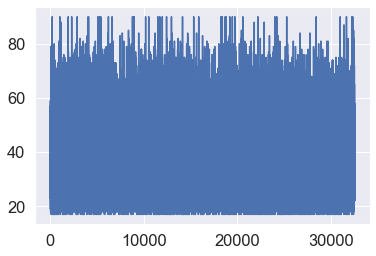

In [22]:
cen1.Age.plot.line()

minimum age of 18 to max age of 90 years are collected in the data

<AxesSubplot:>

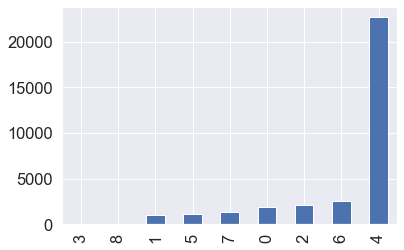

In [23]:
cen1.Workclass.value_counts().sort_values(ascending=True).plot.bar()

<AxesSubplot:>

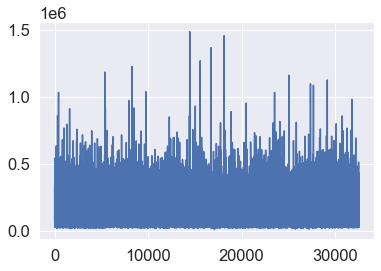

In [24]:
cen1.Fnlwgt.plot.line()

there is range of 2500 to 1500000

<AxesSubplot:>

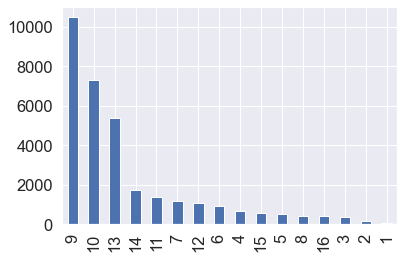

In [25]:
cen1.Education_num.value_counts().plot.bar()

9 category is high 

<AxesSubplot:>

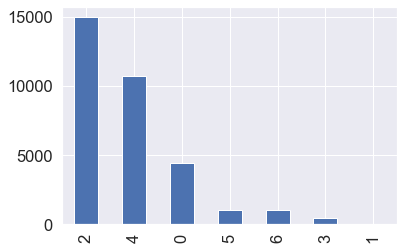

In [26]:
cen1.Marital_status.value_counts().plot.bar()

there are 7 categories in which 2 has the high number

<AxesSubplot:>

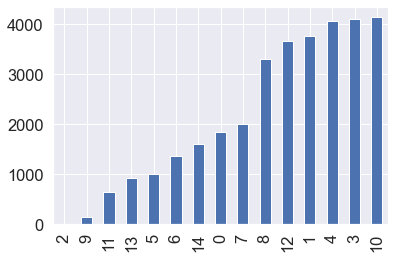

In [27]:
cen1.Occupation.value_counts().sort_values().plot.bar()

15 types with 4,3,10 types at the highest

<AxesSubplot:>

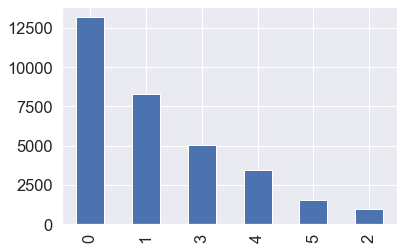

In [28]:
cen1.Relationship.value_counts().plot.bar()

6 classes in this field with 1 has leading

<AxesSubplot:>

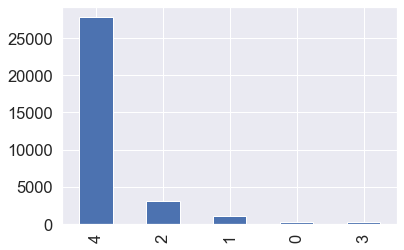

In [29]:
cen1.Race.value_counts().plot.bar()

5 calsses with 4 type has the leading number

<AxesSubplot:>

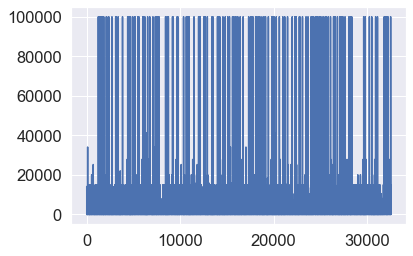

In [30]:
cen1.Capital_gain.plot.line()

<AxesSubplot:>

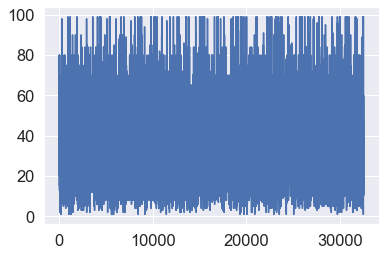

In [31]:
cen1.Hours_per_week.plot.line()

it is varies from 0 to 100 

<AxesSubplot:>

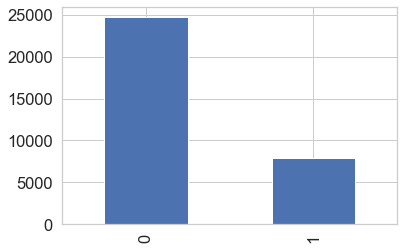

In [32]:
sns.set_theme(style='whitegrid',palette='deep',font_scale=1.5)
cen1.Income.value_counts().plot.bar()

less than 50k are more compared to greater than 50k income

### Bivarient Analysis

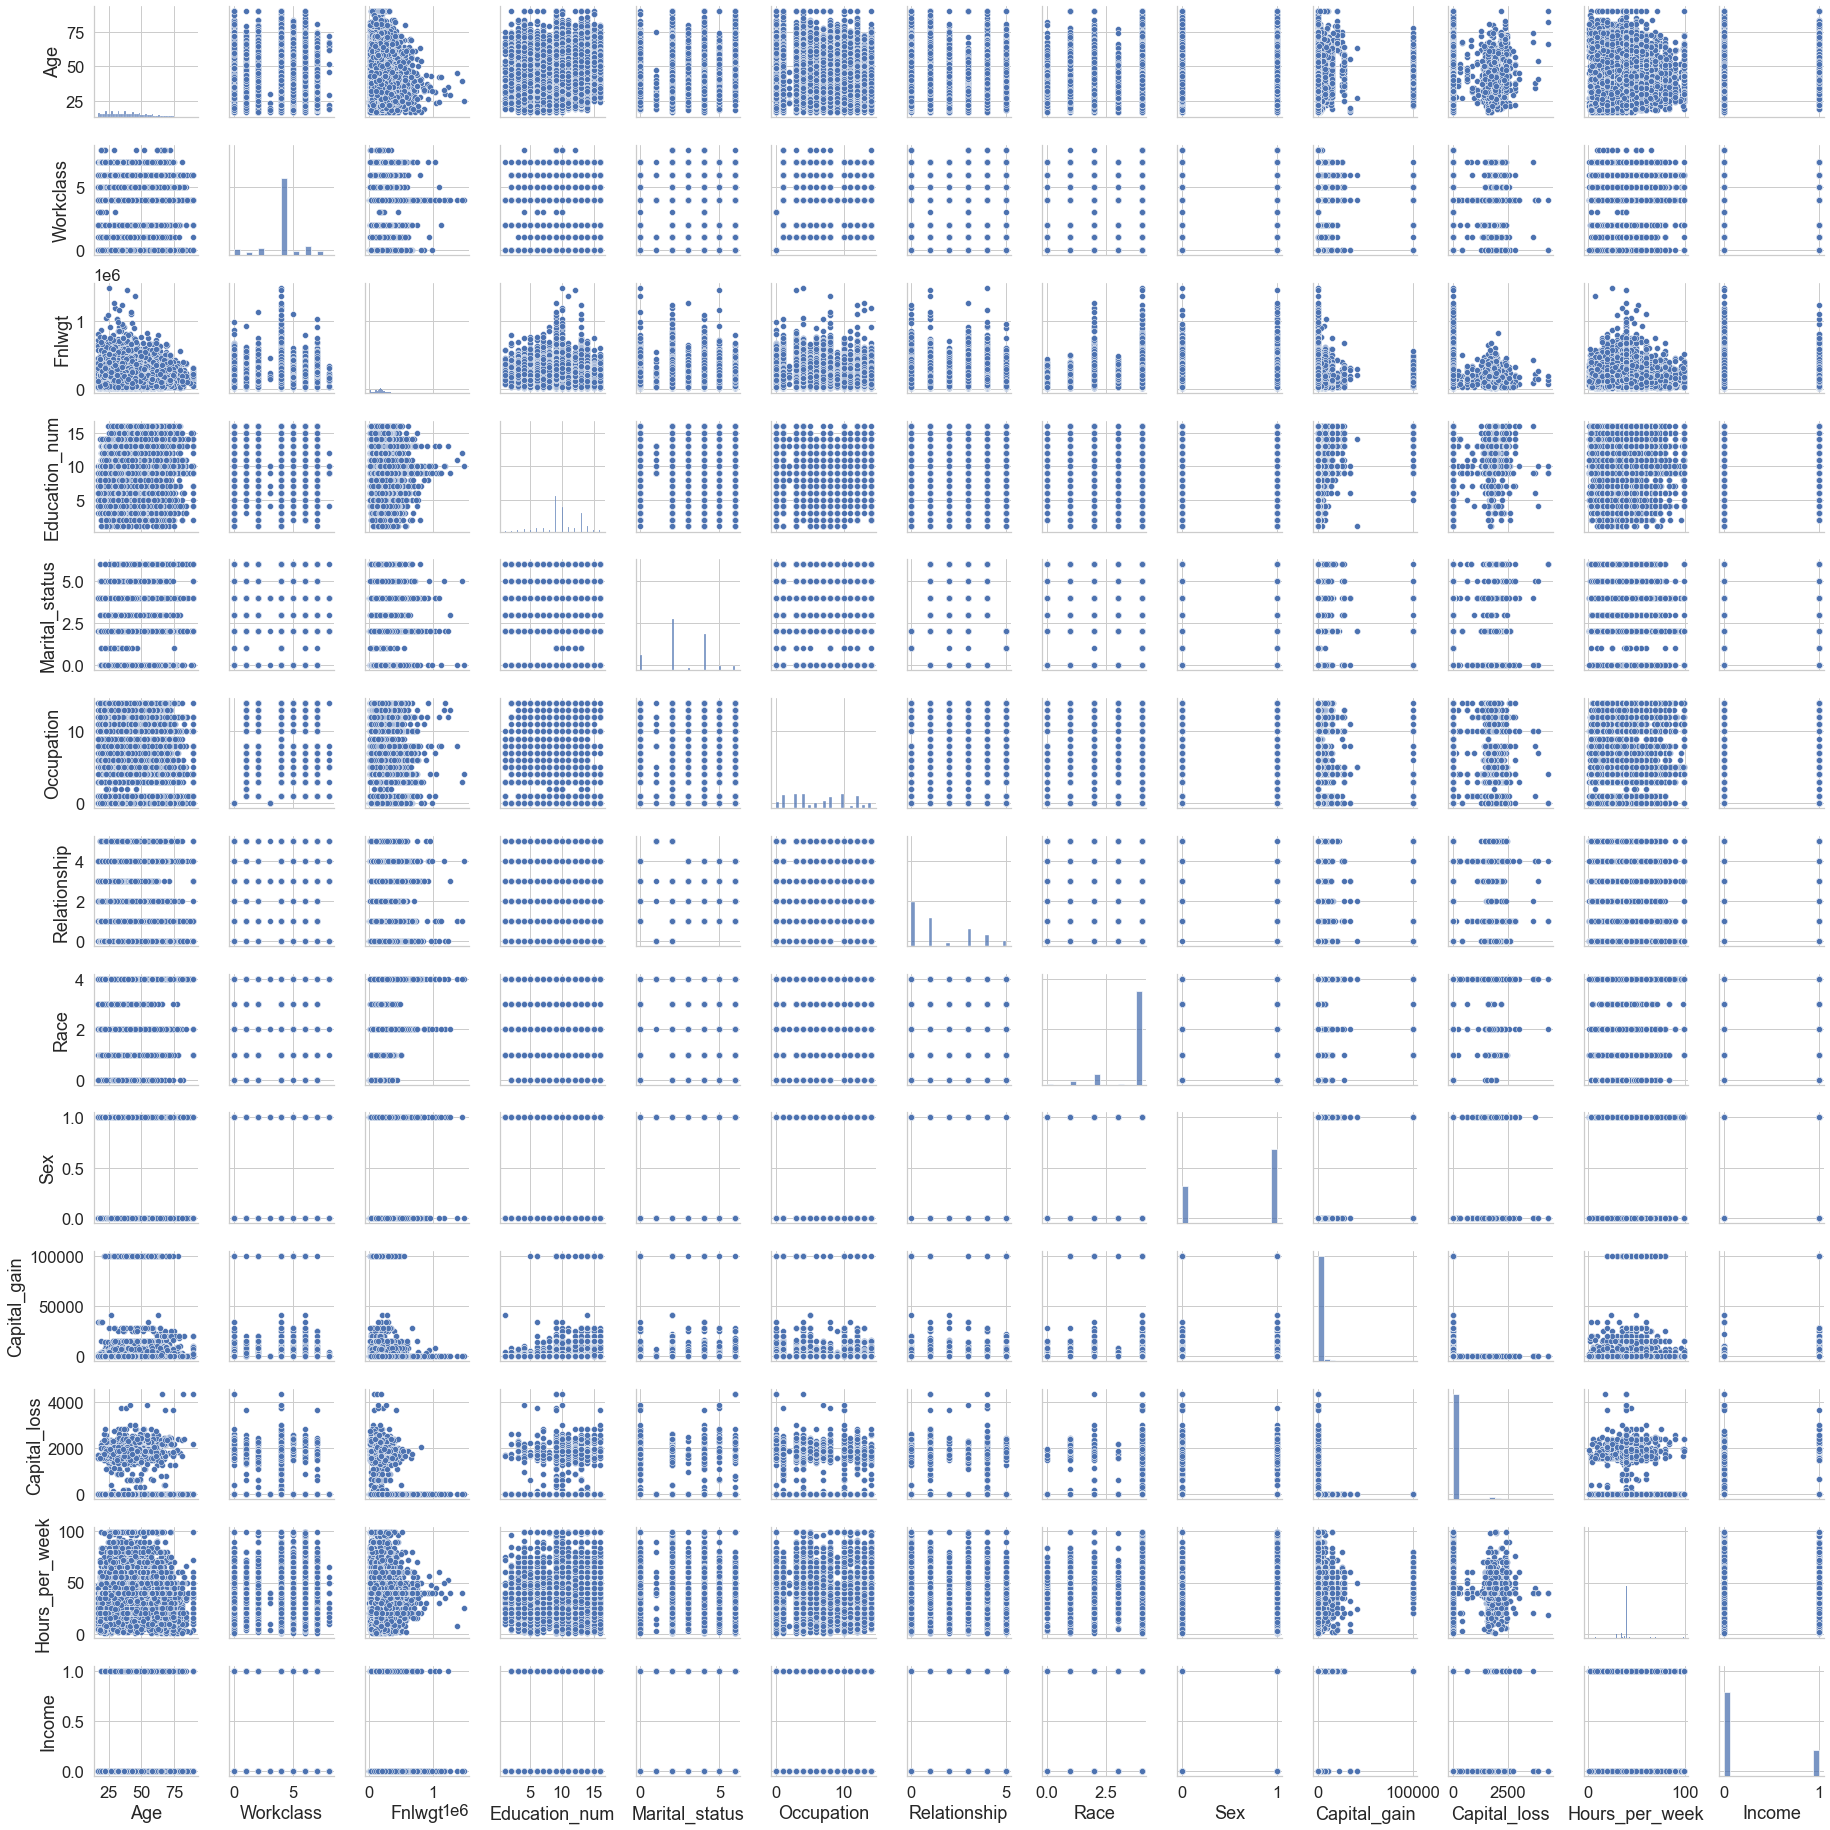

In [33]:
sns.set_theme(style='whitegrid',palette='deep',font_scale=1.5)
sns.pairplot(cen1,height=2,aspect=1)

so we can see that the variuos fileds scatter plots in this pair plot

### checking for outliers

Age                  AxesSubplot(0.125,0.749828;0.227941x0.130172)
Workclass         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Fnlwgt            AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Education_num        AxesSubplot(0.125,0.593621;0.227941x0.130172)
Marital_status    AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Occupation        AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Relationship         AxesSubplot(0.125,0.437414;0.227941x0.130172)
Race              AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Sex               AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Capital_gain         AxesSubplot(0.125,0.281207;0.227941x0.130172)
Capital_loss      AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Hours_per_week    AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Income                  AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

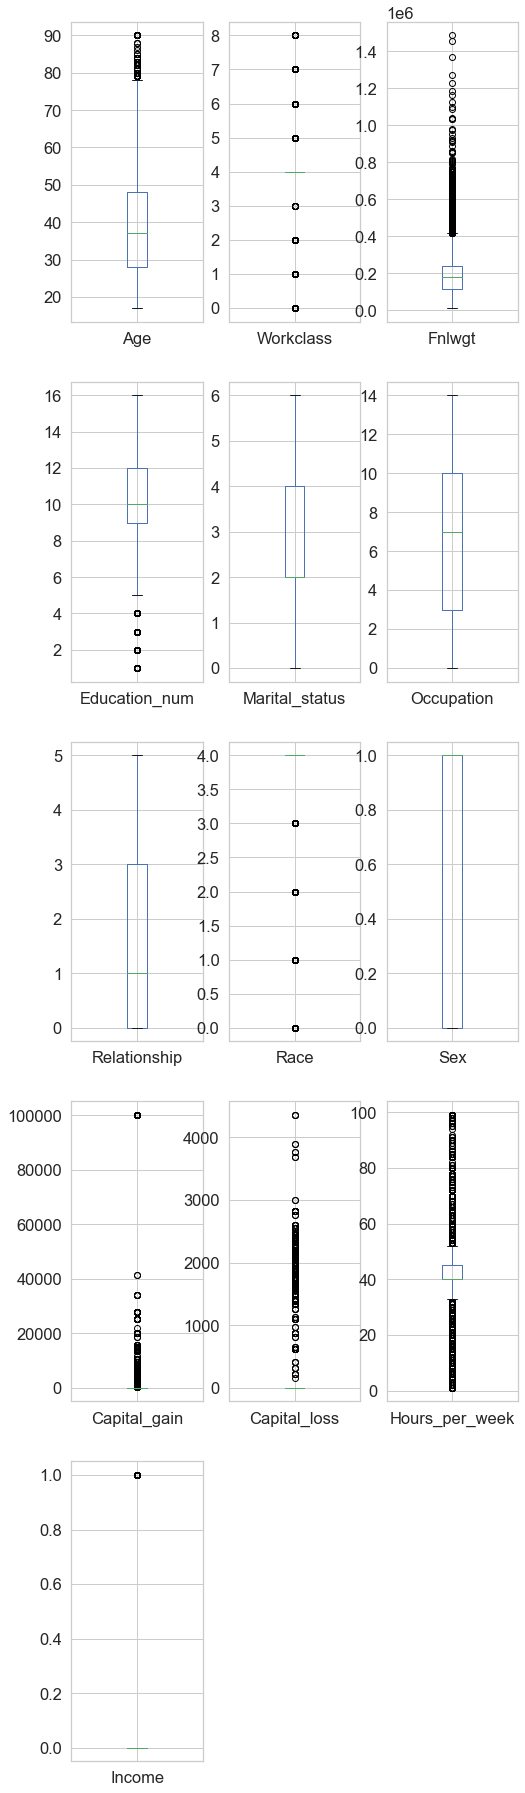

In [34]:
cen1.plot(kind='box', subplots=True,layout=(5,3),figsize=(8,32))

In our continuos data like age, Fnlwgt, captialgain,captial loss, Hours_per_week are having outliers

we are going to remove them in coming steps

### Removing of outliers from the data set

by calculating the zscore data with z value greater than 3 can be dropped 

In [35]:
#importing the required libraries
import numpy as np
from scipy.stats import zscore

In [36]:
z=np.abs(zscore(cen1))

In [37]:
threshold=3

In [39]:
np.where(z>3)

(array([    9,    10,    13, ..., 32532, 32550, 32552], dtype=int64),
 array([11,  7,  7, ...,  7,  7,  7], dtype=int64))

In [40]:
cen2=cen1[(z<=3).all(axis=1)]

In [41]:
print('% data loss',(cen1.size-cen2.size)*100/cen1.size)

% data loss 12.192874692874692


I am lossing more than 10% data while my limit of z is 3 so I take it as 4

In [42]:
cen2=cen1[(z<=4).all(axis=1)]
print('% data loss',(cen1.size-cen2.size)*100/cen1.size)

% data loss 5.666461916461916


### Reducing the skewness

In [43]:
cen2.head(2)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,0


In [44]:
# we have the continuos data type as mentioned
x=['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']

In [45]:
# importing the required libraries
from scipy.stats import boxcox 
from sklearn.preprocessing import power_transform
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Age', ylabel='Density'>

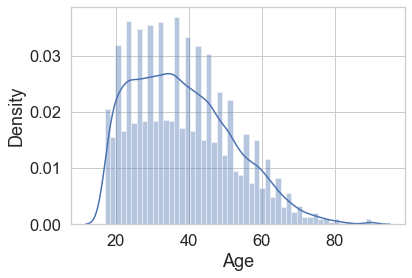

In [46]:
sns.distplot(cen2.Age)

Right skewed

In [47]:
d1=np.array(cen2.Age)
cen2.Age=power_transform(d1.reshape(-1,1))

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

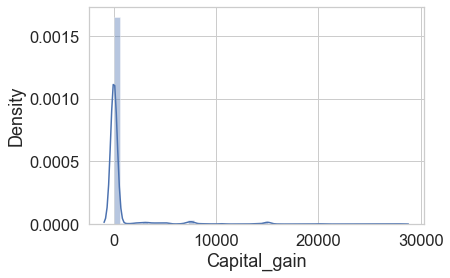

In [48]:
sns.distplot(cen2.Capital_gain)

In [49]:
d1=np.array(cen2.Capital_gain)
cen2.Capital_gain=power_transform(d1.reshape(-1,1))

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

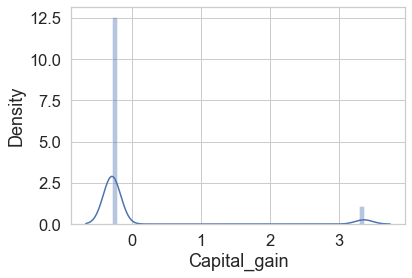

In [50]:
sns.distplot(cen2.Capital_gain)

    this data is not at all fitting in the density cureve
    in further analysis we will decide weather to keep it or to remove it

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

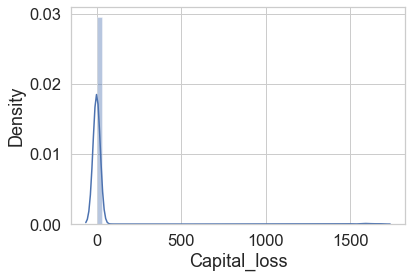

In [51]:
sns.distplot(cen2.Capital_loss)

In [52]:
d1=np.array(cen2.Capital_loss)
cen2.Capital_loss=power_transform(d1.reshape(-1,1))

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

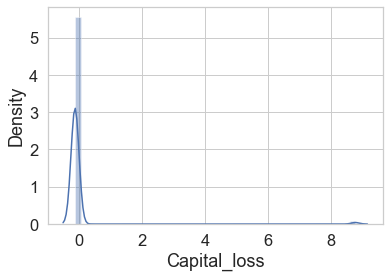

In [53]:
sns.distplot(cen2.Capital_loss)

    this data is not at all fitting in the density cureve
    in further analysis we will decide weather to keep it or to remove it

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

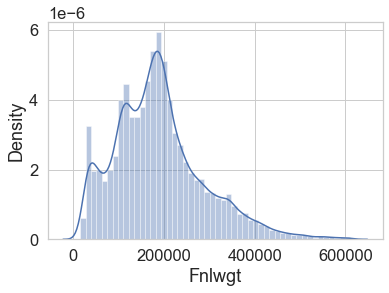

In [54]:
sns.distplot(cen2.Fnlwgt)

In [55]:
d1=np.array(cen2.Fnlwgt)
cen2.Fnlwgt=power_transform(d1.reshape(-1,1))

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

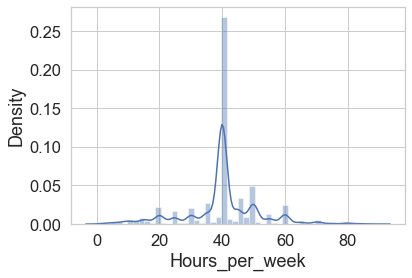

In [56]:
sns.distplot(cen2.Hours_per_week)

In [57]:
d1=np.array(cen2.Hours_per_week)
cen2.Hours_per_week=power_transform(d1.reshape(-1,1))

### Checking the correlation between the variables and VIF calculation

<AxesSubplot:>

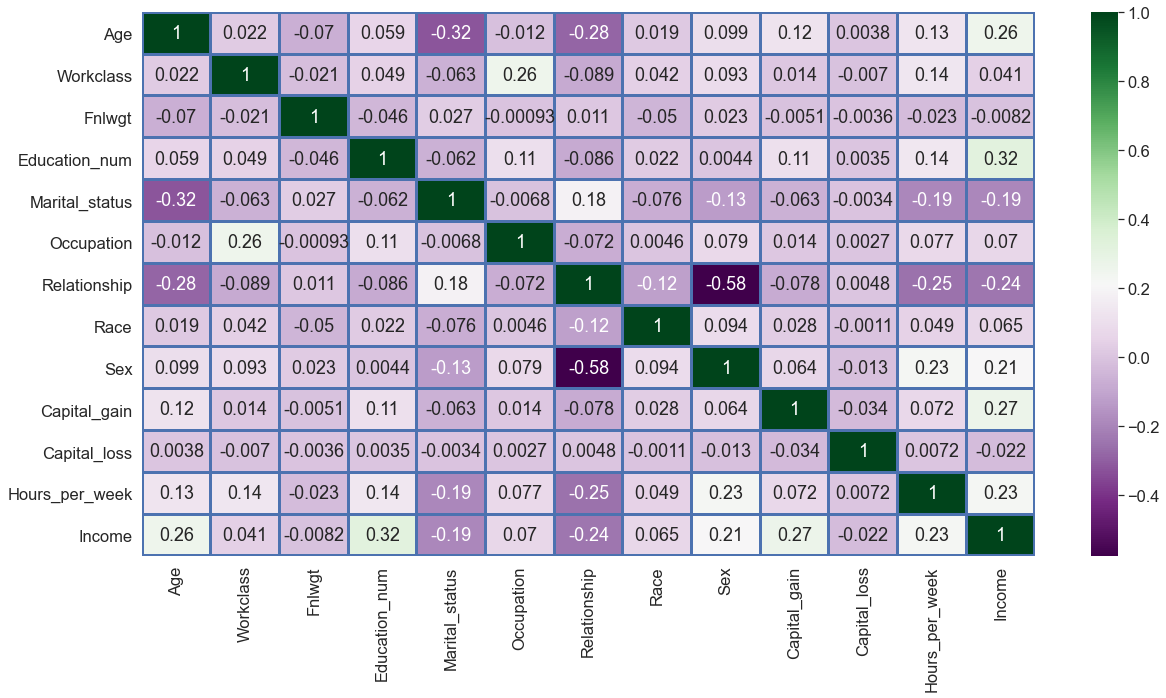

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(cen2.corr(),annot=True, cmap='PRGn', linewidths=2,linecolor='b')

with Income the capital_loss is having very less corelation we are going to drop it in further steps

### VIF Calaculation

In [59]:
# importing the required liibraries
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

      column_names  VIF Values
0             Race   14.735033
1    Education_num   13.595356
2        Workclass    8.085445
3   Marital_status    4.258531
4              Sex    4.142651
5       Occupation    3.672075
6     Relationship    2.694846
7           Income    1.710103
8              Age    1.211991
9   Hours_per_week    1.146841
10    Capital_gain    1.081307
11          Fnlwgt    1.008759
12    Capital_loss    1.001975


array([<AxesSubplot:title={'center':'VIF Values'}, xlabel='column_names'>],
      dtype=object)

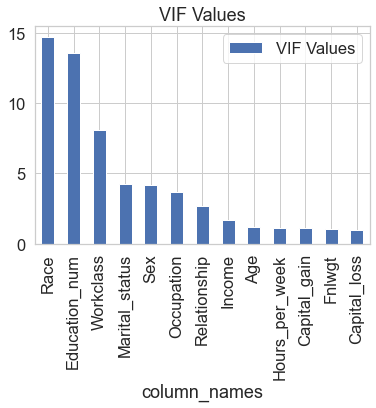

In [60]:
vf=pd.DataFrame()
vf['column_names']=cen2.columns
vf['VIF Values']=[variance_inflation_factor(cen2.values,n) for n in range(cen2.shape[1])]
vf.sort_values(by='VIF Values', ascending=False, inplace=True, ignore_index=True)
print(vf)
vf.plot.bar(x='column_names', y='VIF Values',stacked=True, subplots=True, rot=90)

    the correlation between the independent variables is very less
    as from the previous discussion we drop the capital_loss column

In [61]:
cen3=cen2.drop(['Capital_loss'],axis=1)

### Scaling

the purpose of scaling is to nulify the units of measure of each filed and reduce the magnitude or size of the each entry

In [67]:
#importing scaling methods
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [66]:
cen3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30715 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30715 non-null  float64
 1   Workclass       30715 non-null  int32  
 2   Fnlwgt          30715 non-null  float64
 3   Education_num   30715 non-null  int64  
 4   Marital_status  30715 non-null  int32  
 5   Occupation      30715 non-null  int32  
 6   Relationship    30715 non-null  int32  
 7   Race            30715 non-null  int32  
 8   Sex             30715 non-null  int32  
 9   Capital_gain    30715 non-null  float64
 10  Hours_per_week  30715 non-null  float64
 11  Income          30715 non-null  int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 2.2 MB


In [68]:
cen3.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Income
0,0.903591,6,-1.117364,13,2,4,0,4,1,-0.297407,-2.183112,0
1,0.120994,4,0.399405,9,0,6,1,4,1,-0.297407,-0.029547,0
2,1.073935,4,0.571908,7,2,6,0,2,1,-0.297407,-0.029547,0
3,-0.711813,4,1.404086,13,2,10,5,2,0,-0.297407,-0.029547,0
4,0.046672,4,0.991513,14,2,4,5,4,0,-0.297407,-0.029547,0


In [73]:
scale=StandardScaler()
d=np.array(cen3['Age'])
scale.fit(d.reshape(-1,1))
scale.transform(d.reshape(-1,1))
cen3['Age']=d

In [75]:
scale=StandardScaler()
d=np.array(cen3['Fnlwgt'])
scale.fit(d.reshape(-1,1))
scale.transform(d.reshape(-1,1))
cen3['Fnlwgt']=d

In [77]:
scale=StandardScaler()
d=np.array(cen3['Capital_gain'])
scale.fit(d.reshape(-1,1))
scale.transform(d.reshape(-1,1))
cen3['Capital_gain']=d

In [79]:
scale=StandardScaler()
d=np.array(cen3['Hours_per_week'])
scale.fit(d.reshape(-1,1))
scale.transform(d.reshape(-1,1))
cen3['Hours_per_week']=d

### Balancing the Data Set

In [82]:
#splitting the future columns and target columns
x=cen3.iloc[:,0:-1]
y=cen3.iloc[:,-1]

In [83]:
#size before balancing of data set
x.shape,y.shape,y.value_counts()

((30715, 11),
 (30715,),
 0    23838
 1     6877
 Name: Income, dtype: int64)

In [84]:
# importing the required library
from imblearn.over_sampling import SMOTE
x, y = SMOTE().fit_resample(x, y)

In [85]:
#size after balancing of data set
x.shape,y.shape,y.value_counts()

((47676, 11),
 (47676,),
 0    23838
 1    23838
 Name: Income, dtype: int64)

### Hyper perameter Tuning

its time to select the best model for this data set

In [88]:
# importing the required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
lr,rf,ac,dt=LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),DecisionTreeClassifier()

In [89]:
#creating perameters
model_par={
           lr:{'model':lr,'param':{'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}},
    rf:{'model':rf,'param':{'n_estimators':[100,125,150,200],'criterion':["gini", "entropy"],'min_samples_split':[2,2.5,3,3.5]}},
    ac:{'model':ac,'param':{'n_estimators':[50,100,150,200],'learning_rate':[1,2,3,4],'algorithm':['SAMME', 'SAMME.R']}},
    dt:{'model':dt,'param':{'criterion':["gini", "entropy"],'splitter':['best','random'],'min_samples_leaf':[1,2,3]}}
           }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': LogisticRegression(),
  'best_score': 0.7583690012599289,
  'best_params': {'penalty': 'none', 'solver': 'sag'}},
 {'model': RandomForestClassifier(),
  'best_score': 0.8948956577321983,
  'best_params': {'criterion': 'entropy',
   'min_samples_split': 2,
   'n_estimators': 200}},
 {'model': AdaBoostClassifier(),
  'best_score': 0.8478697851961863,
  'best_params': {'algorithm': 'SAMME.R',
   'learning_rate': 1,
   'n_estimators': 200}},
 {'model': DecisionTreeClassifier(),
  'best_score': 0.8476811719803058,
  'best_params': {'criterion': 'entropy',
   'min_samples_leaf': 1,
   'splitter': 'random'}}]

So we are going to select the RandomForestClassifier as it was highest score from gridsearch cv

In [90]:
rf=RandomForestClassifier(criterion='entropy',min_samples_split=2)

the model performs best at random state 4
test accuracy_score of 0.9653918758302454
test roc_auc_score of 0.9924370652092895
train accuracy_score of 0.9683576543912744
train roc_auc_score of 0.993087837273543
cross validation score 88.80778588807786
confusion_matrix of 
 [[6881  290]
 [ 205 6927]]
classification_report of 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      7171
           1       0.96      0.97      0.97      7132

    accuracy                           0.97     14303
   macro avg       0.97      0.97      0.97     14303
weighted avg       0.97      0.97      0.97     14303



Text(0.5, 1.0, 'ROC Curve')

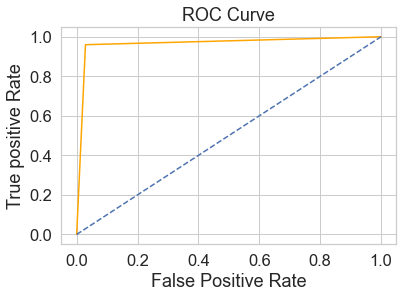

In [91]:
tep,trp,I=[],[],[]
for i in range(1,10):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=i)
    rf.fit(xtrain,ytrain)
    test_pre=rf.predict(xtest)
    train_pre=rf.predict(xtrain)
    Tep=accuracy_score(ytest,test_pre)
    Trp=accuracy_score(ytrain,train_pre)
    Cv=cross_val_score(rf,x,y,cv=3).mean()*100
    tep.append(Tep)
    trp.append(Trp)
    I.append(i)
    
values=pd.DataFrame({'Test_acc':tep,'Train_acc':trp,'random_state':I})
values.sort_values(by='Test_acc',inplace=True,ignore_index=True)
print('the model performs best at random state',values.iloc[0,2])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=values.iloc[0,2])
test_pre=rf.predict(xtest)
train_pre=rf.predict(xtrain)
test_pre_prob=rf.predict_proba(xtest)
train_pre_prob=rf.predict_proba(xtrain)
print("test accuracy_score of",accuracy_score(ytest,test_pre))
print("test roc_auc_score of", roc_auc_score(ytest,test_pre_prob[:,1]))
print("train accuracy_score of",accuracy_score(ytrain,train_pre))
print("train roc_auc_score of", roc_auc_score(ytrain,train_pre_prob[:,1]))
print("cross validation score", cross_val_score(rf,x,y,cv=3).mean()*100)
print("confusion_matrix of",'\n', confusion_matrix(ytest,test_pre))
print("classification_report of",'\n',classification_report(ytest,test_pre))
fpr,tpr,tr=roc_curve(test_pre, ytest)
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve")

In [92]:
#model saving
import pickle
filename='census_income.pkl'
pickle.dump(rf,open(filename,'wb'))